# I. Import các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd   
import seaborn as sns
import matplotlib.pyplot as plt

# II. Đọc Data vào Dataframe. Data được thu thập thủ công từ trang https://www.worldometers.info/coronavirus/ vào ngày 04/05/2022

In [2]:
Data = pd.read_csv('Raw_data.csv',sep=';')

In [3]:
Data

,#,"Country, Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/1M pop,Population
0,NaN,World,"513,697,783","154,755","6,262,191",623.0,"467,939,862","337,659","39,495,730","40,904","65,903",803.4,NaN,NaN,NaN
1,1.0,USA,"83,356,490","71,798","1,023,513",305.0,"80,836,418","38,675","1,496,559","1,655","249,149","3,059","1,008,201,262","3,013,472","334,564,690"
2,2.0,India,"43,091,299","2,898","523,92",NaN,"42,544,689",NaN,"22,69",698,"30,672",373,"838,628,250","596,93","1,404,902,630"
3,3.0,Brazil,"30,502,501","20,072","663,816",51.0,"29,602,372","17,068","236,313","8,318","141,653","3,083","63,776,166","296,176","215,332,283"
4,4.0,France,"28,805,690","47,925","146,376",114.0,"27,301,135","137,222","1,358,179","1,511","439,523","2,233","269,816,888","4,116,918","65,538,567"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,224.0,MS Zaandam,9,NaN,2,NaN,7,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
225,225.0,Niue,9,NaN,NaN,NaN,8,1,1,NaN,"5,468",NaN,NaN,NaN,"1,646"
226,226.0,Micronesia,7,NaN,NaN,NaN,1,NaN,6,NaN,60,NaN,NaN,NaN,"117,236"
227,227.0,Nauru,5,NaN,NaN,NaN,3,NaN,2,NaN,457,NaN,NaN,NaN,"10,949"


# III. Tiền xử lí dữ liệu

Thay những dòng có giá trị NAN bằng 0, xóa một số cột không cần thiết và chuyển các số liệu về dạng có thể tính toán

In [4]:
def data_preprocessing(Data):
    for col_name in Data:
        temp = []     
        for col in Data[col_name]:
            col = str(col)
            col = col.replace(',','')
            try:   
                col = int(col)
            except:
                pass
            temp.append(col)
        Data[col_name] = temp
    return Data

In [5]:
Data = Data.fillna(0)
Data = data_preprocessing(Data) 
Data.drop("#", axis=1, inplace=True)
Data = Data.drop([0])
Data.to_csv('Preprocess_Data.csv')

In [6]:
Data

,"Country, Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/1M pop,Population
1,USA,83356490,71798,1023513,305.0,80836418,38675,1496559,1655,249149,3059,1008201262,3013472,334564690
2,India,43091299,2898,52392,0.0,42544689,0,2269,698,30672,373,838628250,59693,1404902630
3,Brazil,30502501,20072,663816,51.0,29602372,17068,236313,8318,141653,3083,63776166,296176,215332283
4,France,28805690,47925,146376,114.0,27301135,137222,1358179,1511,439523,2233,269816888,4116918,65538567
5,Germany,25116363,16696,136405,222.0,22841300,1827,2138658,1446,298027,1619,122332384,1451576,84275579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,MS Zaandam,9,0,2,0.0,7,0,0,0,0,0,0,0,0
225,Niue,9,0,0,0.0,8,1,1,0,5468,0,0,0,1646
226,Micronesia,7,0,0,0.0,1,0,6,0,60,0,0,0,117236
227,Nauru,5,0,0,0.0,3,0,2,0,457,0,0,0,10949


# IV. Trực quan hóa với các mô hình

## 1. Top 20 quốc gia có nhiều ca tử vong nhất.
(Trường được chọn: "Total Deaths")

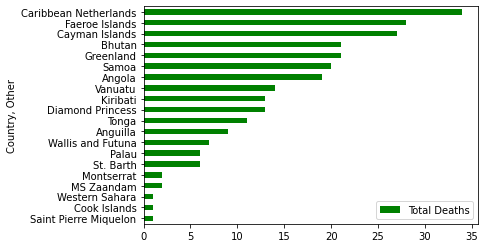

In [22]:
copy_Data = Data.set_index('Country, Other')
TopDeath_df = copy_Data.drop(copy_Data[copy_Data['Total Deaths'] == 0].index)
TopDeath_df = TopDeath_df['Total Deaths']
TopDeath_df = TopDeath_df.to_frame().sort_values(by = 'Total Deaths',ascending = True)
barh = TopDeath_df.head(20).plot.barh(color = 'green')

## 2. Tỉ lệ người dân ở mỗi quốc gia được test

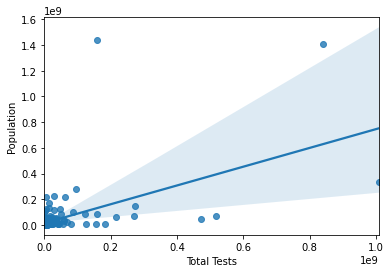

In [8]:
sns.regplot(x="Total Tests",y="Population",data=Data);

- Nhìn vào biểu đồ ta thấy được những nước có dân số ít tỉ lệ được test của người dân càng nhiều. Tuy nhiên ở đây ta thấy có một số bất thường outlier mặc dù có dân số cao nhưng tỉ lệ người dân được test thấp.Ta sẽ tìm hiểu thêm về outlier này

In [9]:
Datasort_df = Data.sort_values(by=['Population'], ascending=False)
Datasort_df

,"Country, Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/1M pop,Population
108,China,218198,362,5128,16.0,19855,2092,1452,620,152,4,160000000,111163,1439323776
2,India,43091299,2898,52392,0.0,42544689,0,2269,698,30672,373,838628250,59693,1404902630
1,USA,83356490,71798,1023513,305.0,80836418,38675,1496559,1655,249149,3059,1008201262,3013472,334564690
19,Indonesia,6047491,176,156321,16.0,5884325,266,6845,2771,21689,561,95739932,343361,278831339
47,Pakistan,1528603,39,30372,0.0,1494141,0,409,108,6682,133,28212367,123327,228761407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,Vatican City,29,0,0,0.0,29,0,0,0,36025,0,0,0,805
228,Saint Helena,2,0,0,0.0,2,0,0,0,327,0,0,0,611
206,British Virgin Islands,6355,0,62,0.0,0,0,0,1,20768,2026,103049,3367614,306
216,Diamond Princess,712,0,13,0.0,699,0,0,0,0,0,0,0,0


- Nhìn vào dataframe đã được sort ta thấy China mặc dù có dân số cao nhất nhưng tỉ lệ người dân được test thấp xấp xỉ 11%. Trong khi đó nước India có dân số tương đương nhưng tỉ lệ test cao xấp xỉ 60%. Có thể do China không cập nhật đủ số liệu hoặc cố ý cập nhật không chính xác.

## 3. Khả năng được chữa khỏi của người dân ở các nước khác nhau

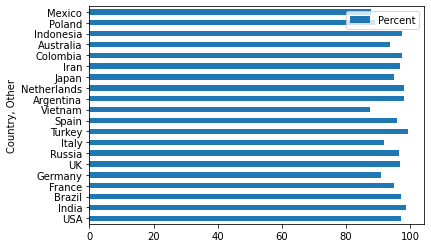

In [24]:
Recover_df = copy_Data[['Total Cases','Total Recovered']]
Recover_df = Recover_df.drop(Recover_df[Recover_df['Total Cases'] == 0 ].index)
Recover_df = Recover_df.drop(Recover_df[Recover_df['Total Recovered'] == 0 ].index)
Recover_df['Percent'] = (Recover_df['Total Recovered']/ Recover_df['Total Cases'])*100
Recover_df.drop("Total Cases", axis=1, inplace=True)
Recover_df.drop("Total Recovered", axis=1, inplace=True)
#Recover_df.sort_values(by="Percent",ascending=True,axis=0,inplace=True)
bar = Recover_df.head(20).plot.barh()

## 4. Top 10 quốc gia có tổng số ca nhiễm cao nhất thế giới 

(Trường được chọn: "Country, Other" và "Total Cases")

In [11]:
df_groupbyCase=Data.groupby("Country, Other",axis=0).sum()
df_groupbyCase.sort_values(by="Total Cases",ascending=False,axis=0,inplace=True)
df_groupbyCase=df_groupbyCase.head(10)
df_groupbyCase=df_groupbyCase["Total Cases"]
df_groupbyCase

Country, Other
USA         83356490
India       43091299
Brazil      30502501
France      28805690
Germany     25116363
UK          22090523
Russia      18206167
S. Korea    17395791
Italy       16633911
Turkey      15037242
Name: Total Cases, dtype: int64

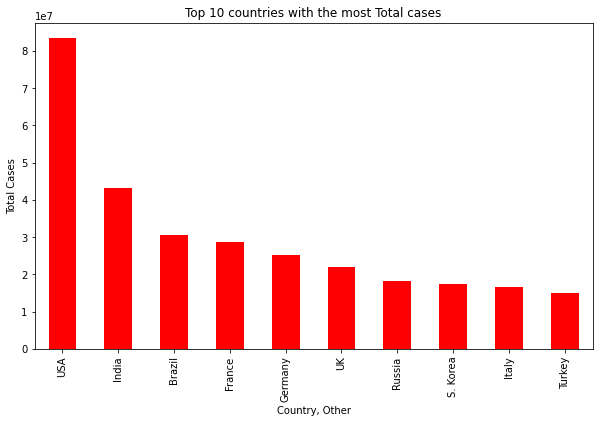

In [12]:
df_groupbyCase.plot(kind='bar',figsize=(10,6), color = 'red')
plt.ylabel("Total Cases")
plt.title("Top 10 countries with the most Total cases");

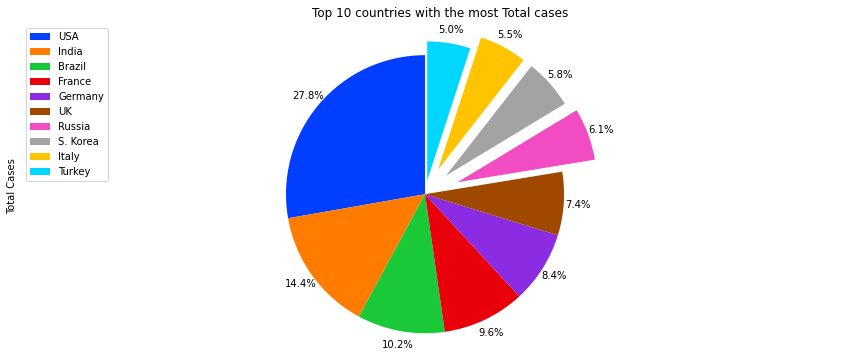

In [13]:
explode_list=[0,0,0,0,0,0,0.25,0.2,0.2,0.1]
df_groupbyCase.plot(kind='pie',figsize=(15,6),autopct="%1.1f%%",startangle=90,labels=None,pctdistance=1.1
                            ,explode=explode_list,colors = sns.color_palette('bright')[0:10])
plt.title("Top 10 countries with the most Total cases")
plt.axis('equal')
plt.legend(labels=df_groupbyCase.index,loc='upper left');

## 5. Biểu đồ thể hiện tương quan trong các ca nhiễm 

(Trường được chọn: "Total Cases", "New Cases", "Total Deaths", "New Deaths", "Total Recovered", "Active Cases", "Serious, Critical")

In [14]:
features = ["Total Cases","New Cases","Total Deaths","New Deaths","Total Recovered","Active Cases","Serious, Critical"]
case_corr = Data[features].corr()
case_corr

,Total Cases,New Cases,Total Deaths,Total Recovered,Active Cases,"Serious, Critical"
Total Cases,1.000000,0.712835,0.852236,0.985483,0.611571,0.458879
New Cases,0.712835,1.000000,0.593193,0.657445,0.601061,0.288863
Total Deaths,0.852236,0.593193,1.000000,0.853311,0.462743,0.576947
Total Recovered,0.985483,0.657445,0.853311,1.000000,0.603662,0.455865
Active Cases,0.611571,0.601061,0.462743,0.603662,1.000000,0.298065
"Serious, Critical",0.458879,0.288863,0.576947,0.455865,0.298065,1.000000


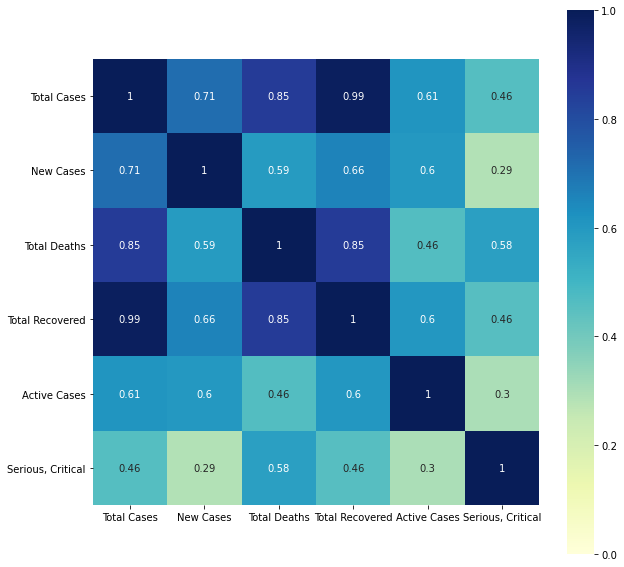

In [15]:
plt.figure(figsize=(10, 10))
sns.heatmap(case_corr,cmap="YlGnBu",vmin=0, annot=True, square=True);

Liêu có nhiều trường có mối quan hệ nhân quả (cause-effect) với nhau không? Ví dụ như tỉ lệ giữa số ca nhiễm - số ca chết, số ca nhiễm - số ca hồi phục và số ca nghiêm trọng - số ca chết)

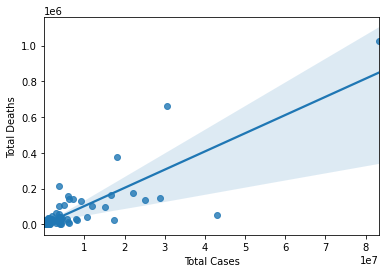

In [16]:
sns.regplot(x="Total Cases",y="Total Deaths",data=Data);

Ta thấy tỉ lệ giữa số ca mắc so với số ca tử vong không đều nhau, nghĩa là không có nghĩa càng nhiều người nhiễm bệnh thì số người tử vong cũng tăng với tỉ lệ tương tự.

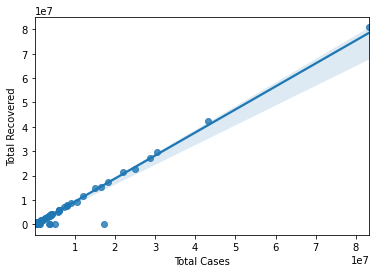

In [17]:
sns.regplot(x="Total Cases",y="Total Recovered",data=Data);

Ta thấy tỉ lệ giữa số ca mắc so với số ca hồi phục rất đều nhau, nghĩa là càng có nhiều người nhiễm bệnh thì số người hết bệnh cũng tăng với tỉ lệ gần như tương tự.

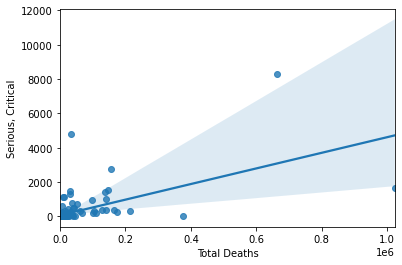

In [18]:
sns.regplot(x="Total Deaths",y="Serious, Critical",data=Data);

Trái ngược với nhận ở trên, tỉ lệ giữa số ca nghiêm trọng/số ca tử vong ngày càng cách xa nhau, tức là nhiều ca nghiêm trọng cũng không hẳn là số ca tử vong cũng tăng tới tỉ lệ tương tự.

<Figure size 7200x3600 with 0 Axes>

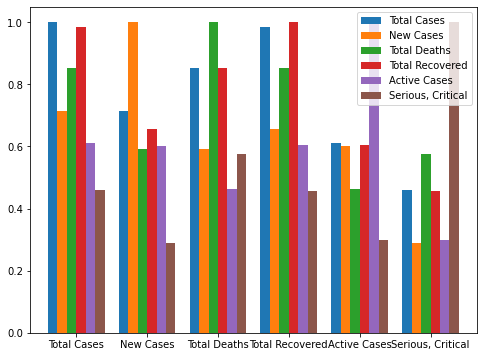

In [19]:
plt.figure(figsize=(100,50))
case_corr.plot.bar(rot = 0, width = 0.8, figsize=(8,6));